In [7]:
from pathlib import Path, PurePath
import matplotlib.pyplot as plt
from typing import *
import numpy as np
import subprocess
from typing import *
root = Path("/data/natsuki/dataset_atmaCup11/checkpoints")

In [8]:
def myplot(root: Path, title: str, names: List[str]):
    plt.rcParams["figure.dpi"] = 100
    plt.grid()
    plt.title(title)
    niter = 10
    for name in names:
        each_epoch_RMSE = list()
        for epoch in range(1, niter+1):
            each_fold_RMSE = list()
            for fold in range(3):
                try:
                    RMSE_fold = float((root/f"{name}_3fold{fold}"/f"epoch{epoch}_3fold{fold}_test_RMSE.csv").read_text())
                except:
                    RMSE_fold = np.nan
                each_fold_RMSE.append(RMSE_fold)
            RMSE_epoch = np.mean(each_fold_RMSE)
#            if epoch == 10:
#                print(name, epoch, RMSE_epoch)
            each_epoch_RMSE.append(RMSE_epoch)
        plt.plot(range(1, niter+1), each_epoch_RMSE, label=name, marker="o")
    plt.legend()

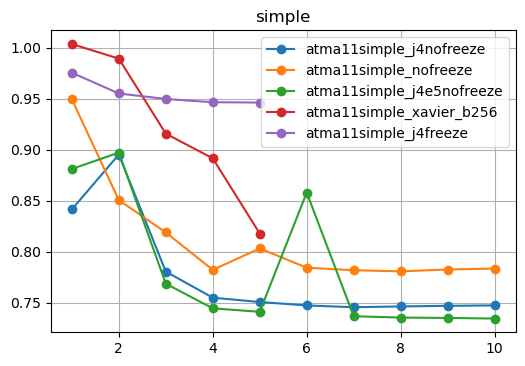

In [9]:
myplot(root, "simple", [
    "atma11simple_j4nofreeze",
    "atma11simple_nofreeze", # 転移元はj3
    "atma11simple_j4e5nofreeze",
    "atma11simple_xavier_b256",
    "atma11simple_j4freeze",
])

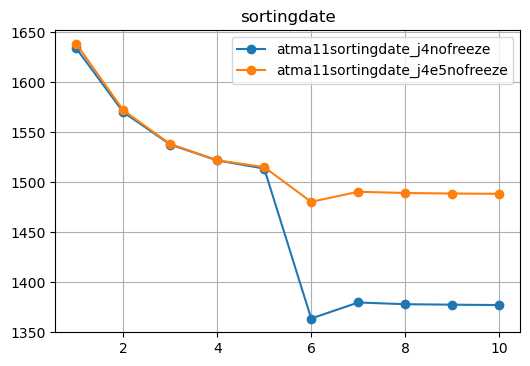

In [10]:
myplot( root, "sortingdate", [
    "atma11sortingdate_j4nofreeze",
    "atma11sortingdate_j4e5nofreeze",
])

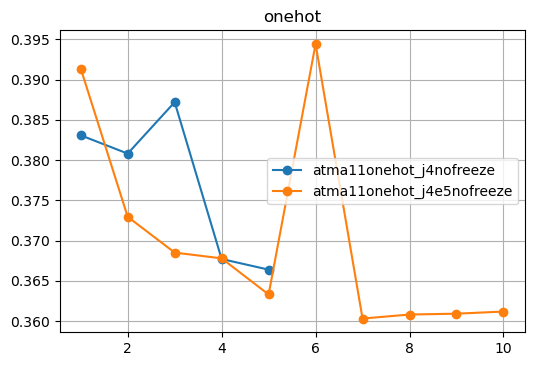

In [11]:
myplot( root, "onehot", [
    "atma11onehot_j4nofreeze", 
    "atma11onehot_j4e5nofreeze",
])

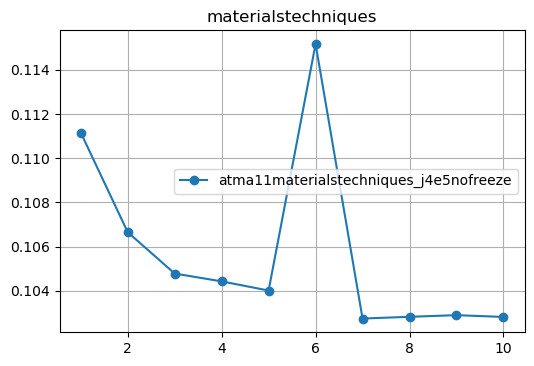

In [12]:
myplot( root, "materialstechniques", [
    "atma11materialstechniques_j4e5nofreeze",
])